# **Resolução do problema 8 da ficha 2.**

a92826, Maria Miguel Soares 

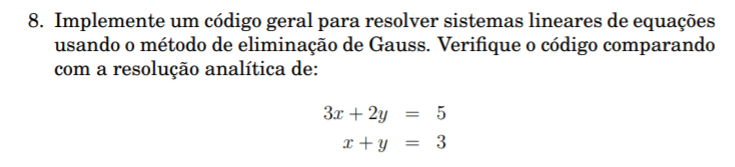

O método da eliminação de Gauss é um algoritmo que permite resolver sistemas de equações lineares. Este método consiste em representar o sistema como uma matriz e manipulá-lo através de operações elementares. 

Desta forma, seja um sistema linear da forma Ax = b, como por exemplo o apresentado de seguida:

\begin{matrix}
a_{11} x_1 & a_{12} x_2 & a_{13} x_3 & = b_1\\
a_{21} x_1 & a_{22} x_2 & a_{23} x_3 & = b_2\\
a_{31} x_1 & a_{32} x_2 & a_{33} x_3 & = b_3\
\end{matrix}


as soluções deste serão encontradas seguindo o método de elimianção de Gauss que consiste na aplicação sequencial das seguintes etapas:
* **Etapa 1:** Obter a matriz aumentada [A|b] 
que representará o sistema de equações lineares;

\begin{pmatrix}
a_{11} & a_{12} & a_{13} & b_1\\
a_{21} & a_{22} & a_{23} & b_2\\
a_{31} & a_{32} & a_{33} & b_3
\end{pmatrix}



* **Etapa 2:** Transformar a matriz aumentada [A|b] numa matriz aumentada [A'|b'] onde a matriz A' é uma  matriz triangular superior;

Com este intuito, o **primeiro passo** passará por zerar todos os elementos da primeira coluna abaixo da diagonal prinicipal. Para isso, executam-se as seguintes operações lineares:

\begin{matrix}
L_2 \leftarrow & L_2 - \frac{a_{21}}{a_{11}}{L_1} \\
L_3 \leftarrow & L_3 - \frac{a_{31}}{a_{11}}{L_1}
\end{matrix}

Obtendo-se:
\begin{pmatrix}
a_{11} & a_{12} & a_{13} & b_1\\
0 & a_{22} & a_{23} & b_2\\
0 & a_{32} & a_{33} & b_3
\end{pmatrix}

Já o segundo passo passará por zerar todos os elementos da segunda coluna abaixo da diagonal principal. Assim, neste caso será necessário executar a seguinte operação:

\begin{matrix}
L_3 \leftarrow & L_3 - \frac{a_{32}}{a_{22}}{L_2}
\end{matrix}

Obtendo-se:

\begin{pmatrix}
a_{11} & a_{12} & a_{13} & b_1\\
0 & a_{22} & a_{23} & b_2\\
0 & 0 & a_{33} & b_3
\end{pmatrix}

* **Etapa 3:** Resolver o sistema [A'|b'] da etapa anterior por substituição regressiva;

Partindo da última matriz da etapa anterior temos:

\begin{matrix}
&&a_{11} x_1 + a_{12} x_2 + a_{13} x_3 & = b_1\\
 && a_{22} x_2 + a_{23} x_3  = b_2\\
 & & a_{33} x_3 = b_3\
\end{matrix}

E desta forma temos que as soluções do sistema serão dadas por:

\begin{matrix}
&& x_3  = \frac{b_3}{a_{33}} \\
&& x_2  = \frac {b_2 - a_{23} x_3}{a_{22}} \\
&& x_1 = \frac {b_1 - a_{12} x_2 - a_{13} x_3}{a_{11}}\\
\end{matrix}

E desta forma são encontradas as soluções [x1, x2, x3] do sistema Ax =b.


No método da eliminação de Gauss é importante notar algumas características: 
- no primiero passo da segunda etapa são zerados todos os primeiros elementos de todas as linhas da matriz por um fator A [m][i]/ A[i][i] onde m corresponde à linha que estamos naquele instante a alterar e i está sempre decrementado uma unidade em relação a m.
- já o segundo passo corresponde precisamente a uma segunda iteração, onde o número da linha, i, foi incrementado uma unidade. Fosse o exemplo utilizado com um número de linhas superior a 3 mais iterações teriam sido executadas. 

In [ ]:
import numpy as np                                              #importe de bibliotecas necessárias

matriz = np.array([[3,2,4,80],[2,2,3,60],[3,3,5,95]], 'd')      #introdução da matriz aumentada correspondente ao sistema de equações que queremos resolver

for i in range(len(matriz)):                                    #a variável i vai tomar valores entre [0,1,2] auxiliando para descrever elementos na 1ª/2ª ou 3ª coluna da matriz
  for m in range(i+1, len(matriz)):                             #a variável m será utilizada para descrever a linha que estamos a alterar na etapa 2 do método
    mult= matriz[m][i]/matriz[i][i]                             #definição do fator multiplicativo, por exemplo, a21/a11
    for n in range (i, len(matriz)+1):                          #a variável n tomará valores entre [0,1,2,3] e será utilizada para descrever a coluna dos elementos que estamos a alterar
      matriz[m][n] = matriz[m][n]- mult*matriz[i][n]            #equação correspondente a alteração das linhas, neste caso, é alterado singularmente cada elemento da linha m e da coluna n com o auxílio do fator multiplicado pelo elemento da mesma coluna n mas da linha anterior, i


print(matriz)
                                                                #descrição da 3ª etapa do método
solucoes=[]                                                     #as soluções do sistema serão guardadas na lista chamada soluções
for i in range(len(matriz)):                                    #marcar o número de linhas do sistema que corresponderá ao número total de soluções que o sistema terá
  solucoes.append(0)                                            # marcar com 0 o número de soluções que vamos ter, isto é neste caso inicialmente soluções = [0,0,0] já que temos 3 soluções
linha =len(matriz)-1                                            #na variável linha teremos a linha que estaremos a trabalhar para descobrir a solução, subtraímos menos um já que no caso do python as linhas são 0,1,2 e queremos aplicar a substituição retrocedida queremos começar pela última linha, logo neste caso linha=2
b= len(matriz)                                                  #na variável b vamos guardar o número da última coluna que corresponde aos nossos b's 
while linha>=0:                                                 #ciclo while que é executado enquanto a variável linha é igual ou superior a 0, isto porque queremos percorrer somente as várias linhas da nossa matriz
  x = matriz[linha][b]                                          #em x guardámos o valor dos b's do nosso sistema
  coluna = len(matriz) -1                                       #variável coluna como sendo o número total de linhas da matriz menos uma unidade e marcará o número/posição da solução se é x_0, x_1 ou x_2                                 
  while coluna>linha:                                           #entra num ciclo caso coluna>linha, o que não acontece na determinação de x_3
    x = x - matriz[linha][coluna]*solucoes[coluna]              #acumula em x o numerador das soluções x_1 e x_2
    coluna = coluna -1                                          #decrementa a variável
  x = x/matriz[linha][linha]                                    #define em x a solução correspondendo à fração cujo o numerador já foi determinado e o denominador é sempre um elemento da diagonal                             
  linha = linha -1                                              #decrementa linha já que queremos percorrer de baixo para cima as várias linhas da matriz para descobrir as soluções
  solucoes[coluna]=x                                            #correspondendo ao valor da variável coluna vai ser guardada a solução se coluna = 0, temos o x_0 e guardado em primeiro lugar na lista


print(solucoes)

[[ 3.          2.          4.         80.        ]
 [ 0.          0.66666667  0.33333333  6.66666667]
 [ 0.          0.          0.5         5.        ]]
[10.000000000000005, 5.000000000000009, 9.999999999999991]


Considera-se de seguida a resolução do seguinte sistema linear Ax=b pelo método da eliminação de Gauss onde A e b são, respetivamente:

A=\begin{pmatrix}
0 & 1\\
1 & 1\\
\end{pmatrix}

b= \begin{pmatrix}
1\\
2\\
\end{pmatrix}

In [ ]:
import numpy as np

matriz = np.array([[0,1,1],[1,1,2]], 'd')

for i in range(len(matriz)):
  for m in range(i+1, len(matriz)):
    mult= matriz[m][i]/matriz[i][i]
    print(mult)
    for n in range (i, len(matriz)+1):
      matriz[m][n] = matriz[m][n]- mult*matriz[i][n]
      

print(matriz)

solucoes=[]
for i in range(len(matriz)):
  solucoes.append(0)
linha =len(matriz)-1
a= len(matriz)
while linha>=0:
  x = matriz[linha][a]
  coluna = len(matriz) -1
  while coluna>linha:
    x = x - matriz[linha][coluna]*solucoes[coluna]
    coluna = coluna -1
  x = x/matriz[linha][linha]
  linha = linha -1
  solucoes[coluna]=x


print(solucoes)

inf
[[  0.   1.   1.]
 [ nan -inf -inf]]
[nan, nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


Se tentarmos calcular as soluções dá nos como as duas soluções serem "not a number", embora analiticamente sabemos que [1,1] são as soluções deste sistema. Para além disso, se calcularmos o fator multiplicativo é dado como sendo infinito, isto porque neste sistema linear o fator multiplicativo é dado por a21/a11 que é 1/0, ou seja, o denominador é 0 acabando o método de eliminação de gauss por falhar. Assim, uma das falhas deste método deriva quando ocorre uma divisão por 0. 

Situações como esta podem ser evitadas recorrendo ao **pivoteamento parcial**.Este método consiste em fazer uma permutação de linhas de forma a escolher o maior pivô (em módulo) em cada fase, isto é a cada iteração que pretendemos zerar uma coluna o pivo será tomado como o maior valor absoluto da coluna que pretendemos zerar existindo a permutação de linhas sempre que necessário. Por exemplo, no caso da matriz 
\begin{pmatrix}
1 & -3 & 2 & 11\\
-2 & 8 & -1 & -15\\
4 & -6 & 5 & 29
\end{pmatrix}
aplicando o pivoteamento parcial, como o maior valor em módulo é o 4 haverá uma permutação entre a 1ºlinha e a 3ºlinha. De seguida, será zerada a primeira coluna como anteriormente descrita e quando se quiser zerar a 2ª coluna deverá averiguar-se novamente qual o maior valor em módulo nessa coluna que pretendemos zerar. 

De seguida apresenta-se o algoritmo para aplicar o pivoteamento parcial.

In [ ]:
def Pivoteamento(matriz):
    n = len(matriz)
    for j in range(n):
      pivo = abs(matriz[j][j])                                                    #marca como pivo o elemento da diagonal da linha j
      l_pivo = j                                                                  #marca como a linha pivo como sendo j
      for i in range (j+1, n):                                                    #i vai estar a conisderar um elemento da mesma coluna, j, mas da linha seguinte para depois comparar
          if abs(matriz[i][j])>pivo:                                              #se o elemento da coluna abaixo for superior ao pivot
              pivo = abs(matriz[i][j])                                            #então o pivo passa a ser esse elemento
              l_pivo = i                                                          #e a variável que guarda a linha do pivo passa a ser a linha seguinte, i
      if l_pivo > j:                                                              #no casos de a linha pivo for superior à que estamos a trabalhar vamos ter de trocar de linhas
          for k in range (j, n+1):                                                #k vai ser iterado para alterar a coluna da matriz daí a necessidade de ir de len(A)+1 porque a nossa matriz é aumentada e os valores de b também tem de ser alterados
              matriz[j][k],matriz[l_pivo][k] = matriz[l_pivo][k],matriz[j][k]     #troca cada elemento de uma linha j para uma linha pivo e de uma linha pivo para uma j 
      #print(matriz)


                                                                                  #faz o zerar de cada coluna como no método inicial
      for m in range(j+1, len(matriz)):
        mult= matriz[m][j]/matriz[j][j]
        for n in range (j, len(matriz)+1):
          matriz[m][n] = matriz[m][n]- mult*matriz[j][n]
      
      if j == n-1:                                                                #a matriz que nos interessa é a final, isto é, aquela que já passou por todo o processo de pivoteamento e de zerar as colunas
        #print(matriz)
        solucoes=[]                                                               #calculo das soluções da matriz à qual foi aplicada a técnica de pivoteamento
        for i in range(len(matriz)):
          solucoes.append(0)
        linha =len(matriz)-1
        a= len(matriz)
        while linha>=0:
          x = matriz[linha][a]
          coluna = len(matriz) -1
          while coluna>linha:
            x = x - matriz[linha][coluna]*solucoes[coluna]
            coluna = coluna -1
          x = x/matriz[linha][linha]
          linha = linha -1
          solucoes[coluna]=x


        print(solucoes)

In [ ]:
matriz = np.array([[0,1,1],[1,1,2]], 'd')
Pivoteamento(matriz)

[1.0, 1.0]


Assim, verificámos que já foi possível calcular as soluções que esperávamos para o sistema anterior ao qual inicialmente tinha sido apontado uma dificuldade. A importância da aplicação do pivoteamento pode ser traduzida através do seguinte exemplo:



*   Consideremos o seguinte sistema linear;
A=\begin{pmatrix}
\epsilon & 2\\
1 & \epsilon\\
\end{pmatrix}

b= \begin{pmatrix}
4\\
3\\
\end{pmatrix} 

onde |Epsilon| > 0 e |Epsilon| << 1 vamos ter por eliminação gaussiana:

\begin{pmatrix}
\epsilon & 2 & 4\\
0 & \epsilon- \frac {2}{\epsilon} & 3- \frac {4}{\epsilon}\\
\end{pmatrix}

onde

\begin{matrix}
y= \frac {3- \frac {4}{\epsilon}}{\epsilon-\frac {2}{\epsilon}} = \frac {3{\epsilon}-4}{\epsilon^2-2}\\
\end{matrix}

e 

\begin{matrix}
x= \frac {4-2y}{\epsilon}= \frac{2}{\epsilon}(2-y)\\
\end{matrix}

Verificando-se que quando epsilon é pequeno y=2 e consequentemente produz x=0. Já aplicando o pivoteamento teremos:
\begin{pmatrix}
\epsilon & 2 & 4\\
1 & \epsilon& 3\\
\end{pmatrix}

\begin{pmatrix}
1 & \epsilon& 3\\
\epsilon & 2 & 4\\
\end{pmatrix}

\begin{pmatrix}
1 & \epsilon& 3\\
0 & 2-\epsilon^2 & 4-3\epsilon\\
\end{pmatrix}

e temos que:
\begin{matrix}
y= \frac {4- 4\epsilon}{2-\epsilon^2}\\
\end{matrix}

e 

\begin{matrix}
x= 3-\epsilon y\\
\end{matrix}

Neste caso, obtemos expressões semelhantes às anteriores, quando epsilon tende para 0 y tende para 2, como no caso anterior mas x será aproximadamente 3 não dependendo mais de obter (2-y) com precisão. 

Aplicação do método ao sistema pretendido no enunciado:


In [ ]:
matriz = np.array([[3,2,5],[1,1,3]], 'd')
Pivoteamento(matriz)

[-1.0, 4.0]
